Библиотеки загружены!
Dataset URL: https://www.kaggle.com/datasets/nikdavis/steam-store-games
License(s): Attribution 4.0 International (CC BY 4.0)
steam-store-games.zip: Skipping, found more recently modified local copy (use --force to force download)
Размер датасета: (27075, 18)
Столбцы данных:

ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
Первые 5 строки:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
2,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
3,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
4,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
5,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99



ПОСТРОЕНИЕ ГРАФИКОВ


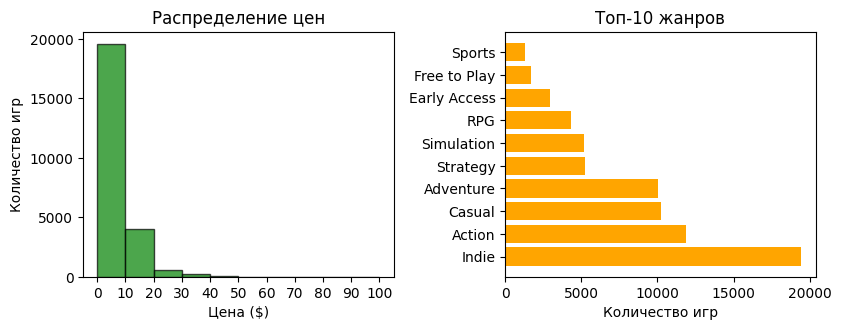


КЛЮЧЕВЫЕ ИНСАЙТЫ
ИНСАЙТЫ:
1. На Steam больше всего дешёвых игр — основной ценовой диапазон до $10.
2. Игры дороже $20 встречаются редко — после этой отметки график резко обваливается.
3. Indie — самый распространённый жанр, сильно опережает все остальные.
4. Action и Casual тоже очень популярны — эти жанры формируют ядро большинства тайтлов.
5. Спортивных и Free-to-Play жанров заметно меньше — они занимают нишевую часть рынка.
Анализ завершен!


In [5]:
# Установка необходимых библиотек с тихим режимом (без вывода подробностей установки)
!pip install pandas numpy matplotlib seaborn kaggle --quiet

# Импорт необходимых библиотек
import pandas as pd  # для работы с табличными данными
import numpy as np   # для математических операций
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns  # для улучшенной визуализации
import warnings  # для управления предупреждениями
warnings.filterwarnings('ignore')  # игнорировать предупреждения

# Настройка отображения графиков
plt.style.use('default')  # использовать стиль по умолчанию
plt.rcParams['figure.figsize'] = (12, 6)  # задать размер графиков по умолчанию

print("Библиотеки загружены!")

# СКАЧИВАНИЕ ДАННЫХ С KAGGLE
import os
import zipfile

# Создаем папку для хранения данных, если она не существует
if not os.path.exists('steam_data'):
    os.makedirs('steam_data')

# Скачиваем датасет с Kaggle
# Команда для загрузки датасета steam-store-games в папку steam_data/
!kaggle datasets download -d nikdavis/steam-store-games -p steam_data/

# Распаковываем скачанный ZIP-архив
with zipfile.ZipFile('steam_data/steam-store-games.zip', 'r') as zip_ref:
    zip_ref.extractall('steam_data/')  # извлекаем все файлы в папку steam_data

# Загрузка данных из CSV-файла
df = pd.read_csv('steam_data/steam.csv')
# Устанавливаем индексы, начиная с 1 (по умолчанию pandas начинает с 0)
df.index = df.index + 1

print("Размер датасета:", df.shape)  # выводим количество строк и столбцов
print("Столбцы данных:")  # комментарий для вывода названий столбцов

# ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
print("\n" + "="*50)  # разделительная линия
print("ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
print("="*50)

print("Первые 5 строки:")  # выводим первые 5 строк для ознакомления с данными
display(df.head(5))  # отображаем первые 5 строк датафрейма

# Создаем копию датафрейма для работы, чтобы не изменять исходные данные
df_clean = df.copy()

# ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\n" + "="*50)
print("ПОСТРОЕНИЕ ГРАФИКОВ")
print("="*50)

# Создаем фигуру с несколькими графиками
# 2 строки, 3 столбца, сейчас будем работать с позицией (2, 2) - второй график
plt.subplot(2, 3, 2)

# ГРАФИК 1: РАСПРЕДЕЛЕНИЕ ЦЕН НА ИГРЫ

# Выбираем только платные игры (цена больше 0)
price_dist = df_clean[df_clean['price'] > 0]['price']

# Ограничиваем диапазон цен для лучшей визуализации (исключаем редкие очень дорогие игры)
price_filtered = price_dist[price_dist <= 100]

# Создаем бины (интервалы) для гистограммы: от 0 до 100 с шагом 10
bins = np.arange(0, 110, 10)

# Строим гистограмму распределения цен
plt.hist(price_filtered, bins=bins, color='green', edgecolor='black', alpha=0.7)
plt.title('Распределение цен')  # заголовок графика
plt.xlabel('Цена ($)')  # подпись оси X
plt.ylabel('Количество игр')  # подпись оси Y
plt.xticks(bins)  # устанавливаем метки на оси X равными границам бинов

# Настраиваем расположение графиков, чтобы они не перекрывались
plt.tight_layout()

# ГРАФИК 2: ТОП-10 ЖАНРОВ ИГР
plt.subplot(2, 3, 3)  # третий график в сетке 2x3

# Импортируем Counter для подсчета частоты элементов
from collections import Counter

# Объединяем все жанры из всех игр в одну строку, разделяем по ';'
# dropna() - игнорируем отсутствующие значения
all_genres = ';'.join(df_clean['genres'].dropna()).split(';')

# Подсчитываем количество каждого жанра
genre_counts = Counter(all_genres)

# Берем 10 самых популярных жанров
top_genres = dict(genre_counts.most_common(10))

# Строим горизонтальную столбчатую диаграмму (barh)
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='orange')
plt.title('Топ-10 жанров')  # заголовок
plt.xlabel('Количество игр')  # подпись оси X

# Еще раз настраиваем расположение графиков
plt.tight_layout()

# Показываем все графики
plt.show()

# ВЫВОДЫ И ИНСАЙТЫ ИЗ АНАЛИЗА
print("\n" + "="*50)
print("КЛЮЧЕВЫЕ ИНСАЙТЫ")
print("="*50)

print("ИНСАЙТЫ:")
print("1. На Steam больше всего дешёвых игр — основной ценовой диапазон до $10.")
print("2. Игры дороже $20 встречаются редко — после этой отметки график резко обваливается.")
print("3. Indie — самый распространённый жанр, сильно опережает все остальные.")
print("4. Action и Casual тоже очень популярны — эти жанры формируют ядро большинства тайтлов.")
print("5. Спортивных и Free-to-Play жанров заметно меньше — они занимают нишевую часть рынка.")

print("Анализ завершен!")  # сообщение о завершении анализа